In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [37]:
a = pd.read_csv('adultKNN.csv')

In [38]:
a.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [39]:
a.shape

(48842, 15)

In [40]:
#a.loc[a.occupation.astype('?',reg)]

In [41]:
a.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

#### There is no null values in anyone columns

In [42]:
a.isnull().sum()[a.isnull().sum()>0]

Series([], dtype: int64)

In [43]:
a.income.value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [44]:
list(a.education.unique())

['11th',
 'HS-grad',
 'Assoc-acdm',
 'Some-college',
 '10th',
 'Prof-school',
 '7th-8th',
 'Bachelors',
 'Masters',
 'Doctorate',
 '5th-6th',
 'Assoc-voc',
 '9th',
 '12th',
 '1st-4th',
 'Preschool']

In [45]:
a.workclass.value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [46]:
a.education.replace({'Preschool':1, '1st-4th':2, '5th-6th':3, '7th-8th':4, '9th':5, '10th':6, '11th':7, '12th':8,
                     'Some-college':9, 'Prof-school':10,'Assoc-voc':11,'HS-grad':12, 'Bachelors':13,'Assoc-acdm':14, 
                      'Masters':15,'Doctorate':16},inplace = True)

In [47]:
a.occupation.value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [48]:
a.workclass.value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [49]:
a.shape

(48842, 15)

In [50]:
a.replace({'?': np.nan})

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,7,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,12,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,14,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,9,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,9,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,14,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,12,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,12,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,12,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [51]:
a.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [52]:
a.replace({'?': None}).dropna().head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,7,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,12,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,14,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,9,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,6,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [53]:
a.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

#### Lable encoder

In [54]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [55]:
a.select_dtypes(include='object').columns

Index(['workclass', 'marital-status', 'occupation', 'relationship', 'race',
       'gender', 'native-country', 'income'],
      dtype='object')

In [56]:
a[a.select_dtypes(include='object').columns] = a[a.select_dtypes(include='object').columns].apply(le.fit_transform)

In [57]:
a.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,4,226802,7,7,4,7,3,2,1,0,0,40,39,0
1,38,4,89814,12,9,2,5,0,4,1,0,0,50,39,0
2,28,2,336951,14,12,2,11,0,4,1,0,0,40,39,1
3,44,4,160323,9,10,2,7,0,2,1,7688,0,40,39,1
4,18,0,103497,9,10,4,0,3,4,0,0,0,30,39,0


In [58]:
a.dtypes

age                int64
workclass          int32
fnlwgt             int64
education          int64
educational-num    int64
marital-status     int32
occupation         int32
relationship       int32
race               int32
gender             int32
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country     int32
income             int32
dtype: object

___________________________________________________________________________________________________________

### Sampling

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
train_a, test_a = train_test_split(a,test_size=0.2)   #split data for train and test

In [61]:
a.shape                                              # Original dataframe shape

(48842, 15)

In [62]:
train_a.shape                                       # Train dataframe shape

(39073, 15)

In [63]:
test_a.shape                                        # test dataframe shape

(9769, 15)

In [64]:
train_a_x = train_a.iloc[ : ,:-1]
train_a_y = train_a.iloc[ : ,-1]

In [65]:
test_a_x =test_a.iloc[ : , :-1]
test_a_y = test_a.iloc[ : ,-1]

### Model Building

In [66]:
from sklearn.neighbors import KNeighborsClassifier

In [67]:
knn = KNeighborsClassifier()

In [68]:
knn.fit(train_a_x,train_a_y)

KNeighborsClassifier()

### Prediction

In [69]:
pred_knn = knn.predict(test_a_x)

In [70]:
from sklearn.metrics import confusion_matrix,recall_score,precision_score

In [71]:
cm = confusion_matrix(test_a_y,pred_knn)
cm

array([[6824,  601],
       [1583,  761]], dtype=int64)

In [72]:
cm_df = pd.DataFrame(cm, index = ['>50K','<=50K'],
columns = ['>50K','<=50K'])

Text(0.5, 1.0, 'Predicted')

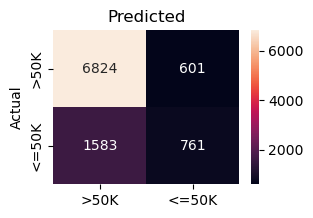

In [73]:
plt.figure(figsize=(3,2))
sns.heatmap(cm_df, annot=True, fmt='g')
plt.ylabel('Actual')
plt.title("Predicted")


### ReCall SCore

In [74]:
recall_score(test_a_y,pred_knn)*100

32.465870307167236

### Precision Score

In [75]:
precision_score(test_a_y,pred_knn)*100

55.87371512481645

In [77]:
from sklearn.neighbors import KNeighborsClassifier

In [78]:
 from sklearn.metrics import confusion_matrix

In [87]:
acc_list = []
for k in range(1,50):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(train_a_x,train_a_y)
    pred = knn.predict(test_a_x)
    tab = confusion_matrix(test_a_y,pred)
    acc = tab.diagonal().sum() * 100 / tab.sum()
    acc_list.append(acc)

In [88]:
import matplotlib.pyplot as plt
k = list(range(1,50))

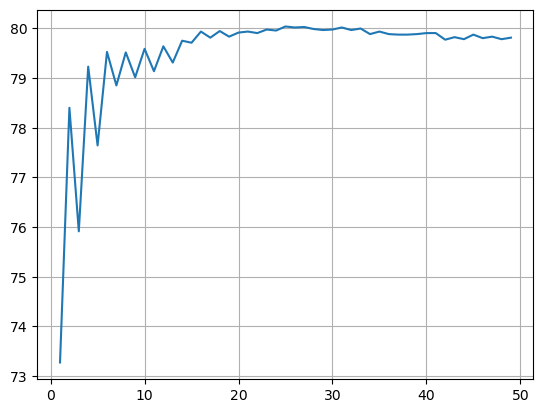

In [89]:
import matplotlib.pyplot as plt
plt.plot(k, acc_list)
plt.grid()

### To Choose the value of K as you are getting High Accuracy and high stability

### as we seen in the graph K value will be 20, where we are getting